## Defensive programming exercise

#### Challenge

Add an assert to the `analyze` function to check that the temperature in celsius is more than -50 and that rainfall is positive

Open the challenge notebook at http://nbviewer.ipython.org/github/zonca/challenges/blob/master/challenge-notebook-4.ipynb, the solution is below

In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def fahr_to_celsius(temp_fahr):
    """Convert temperature from Fahrenheit to Celsius"""
    temp_celsius = (temp_fahr - 32) * 5 / 9.0
    return temp_celsius

def analyze(data):
    """Perform regression analysis on mosquito data
   
    Performs a linear regression based on rainfall and temperature.
    Creates two plots of the results and returns fit parameters.
    
    Parameters
    ----------
    data : pandas.Dataframe
        Column named 'temperature', 'rainfall' and 'mosquitos'.
            
    Returns
    -------
    parameters : list of pandas.Series
        Return a list of the fitting parameters for rainfall and temperature
    
    """
    data['temperature'] = fahr_to_celsius(data['temperature'])
    assert data['temperature'].min() > -50
    assert data['rainfall'].min() > 0
    output = []
    for variable in ['rainfall', 'temperature']:
        # linear fit
        regr_results = sm.OLS.from_formula('mosquitos ~ ' + variable, data).fit()
        parameters = regr_results.params
        line_fit = parameters['Intercept'] + parameters[variable] * data[variable]
        # plotting
        plt.figure()
        plt.plot(data[variable], data['mosquitos'], '.', label="data")
        plt.plot(data[variable], line_fit, 'red', label="fit")
        plt.xlabel(variable)
        plt.ylabel('mosquitos')
        plt.legend(loc='best')
        output.append(parameters)
    return output

In [6]:
%matplotlib inline

[Intercept    41.159816
 rainfall      0.695885
 dtype: float64, Intercept      166.715804
 temperature      0.688853
 dtype: float64]

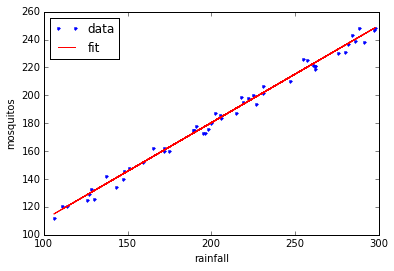

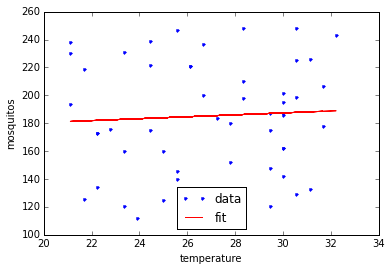

In [7]:
analyze(pd.read_csv('A2_mosquito_data.csv'))